In [11]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
TRAIN_DATA_PATH = 'data/california_housing_train.csv'
TEST_DATA_PATH = 'data/california_housing_test.csv'
TARGET_NAME = 'median_house_value'

In [12]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [13]:
def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled , standard_scaler
x_train_scaled, x_test_scaled, sc = scale_datasets(x_train, x_test)


In [14]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [15]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
213/213 [==============================] - 1s 5ms/step - loss: 5.1195 - mean_squared_logarithmic_error: 5.1082 - val_loss: 0.5844 - val_mean_squared_logarithmic_error: 0.5819
Epoch 2/10
213/213 [==============================] - 1s 4ms/step - loss: 0.2441 - mean_squared_logarithmic_error: 0.2442 - val_loss: 0.3478 - val_mean_squared_logarithmic_error: 0.3524
Epoch 3/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1835 - mean_squared_logarithmic_error: 0.1837 - val_loss: 0.2520 - val_mean_squared_logarithmic_error: 0.2596
Epoch 4/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1455 - mean_squared_logarithmic_error: 0.1455 - val_loss: 0.1868 - val_mean_squared_logarithmic_error: 0.1941
Epoch 5/10
213/213 [==============================] - 1s 4ms/step - loss: 0.1217 - mean_squared_logarithmic_error: 0.1218 - val_loss: 0.1469 - val_mean_squared_logarithmic_error: 0.1536
Epoch 6/10
213/213 [==============================] - 1s 4ms/step - lo

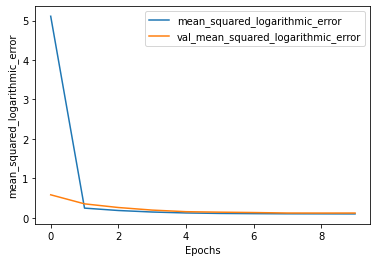

In [16]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [17]:
x_test['prediction'] = model.predict(x_test_scaled)
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,prediction
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,346566.156250
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,195477.859375
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,256513.937500
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330672.031250
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,91703.234375


In [18]:
model.save('my_model.h5')


In [22]:
from pickle import dump
from pickle import load
dump(sc, open('scaler.pkl', 'wb'))
#sc= load(open('scaler.pkl', 'rb'))